In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


IMPORTS




In [0]:
# PART 1
import os
import csv
import pandas as pd
import numpy
import statistics as s
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

# PART 2
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt





PART 1

In [4]:
# cll dataset
datafile="/content/cll_dataset.csv"
# 0- read the file
cll = pd.read_csv(datafile)
# a row is a sample = a patient
# column 'Treat6m' recurrence of the disease, 1 if true, 0 if false
# other columns are features = rate of several types of cells and molecules in the patient
# -----------------------------------------------------------------------------------------
# 1- create X the features, Y the predictions
X = cll.drop(['Treat6m'], axis = 1)
Y = cll.Treat6m

# check
print("cll dimensions: ", cll.shape)
print("cll: \n ", cll.head(5))
print("features X: \n", X.head(5))
print("label Y: \n", Y.head(5))

cll dimensions:  (31, 30)
cll: 
     Treat6m   Naive   EMRA      CM  ...    ICAM-1      CD38      CCR4    CTLA-4
0        1  0.0304  0.260  0.0150  ...  0.990000  0.262730  0.270001  0.163433
1        0  0.1560  0.269  0.0387  ...  0.997190  0.145660  0.321924  0.041356
2        1  0.0646  0.211  0.0363  ...  0.997586  0.385564  0.249591  0.062653
3        0  0.0283  0.240  0.1180  ...  0.999200  0.170346  0.400480  0.067871
4        0  0.0653  0.216  0.0949  ...  0.996289  0.148594  0.156187  0.000000

[5 rows x 30 columns]
features X: 
     Naive   EMRA      CM      EM  ...    ICAM-1      CD38      CCR4    CTLA-4
0  0.0304  0.260  0.0150  0.2580  ...  0.990000  0.262730  0.270001  0.163433
1  0.1560  0.269  0.0387  0.0832  ...  0.997190  0.145660  0.321924  0.041356
2  0.0646  0.211  0.0363  0.2940  ...  0.997586  0.385564  0.249591  0.062653
3  0.0283  0.240  0.1180  0.1300  ...  0.999200  0.170346  0.400480  0.067871
4  0.0653  0.216  0.0949  0.2040  ...  0.996289  0.148594  0.1561

In [0]:
# 2- create a function 'fit_rf' that fit random forests on xtrain, ytrain
# it should return the random forest score on the xtest, ytest set.
# use sklearn implementation
def fit_rf(X, Y):
  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.25)
  rfc = RandomForestClassifier(max_depth=2, random_state=0)
  rfc.fit(xtrain, ytrain)
  score = rfc.score(xtest, ytest)
  return(score)

# check
fit_rf(X,Y)


0.875

In [0]:
# 3- create a function 'repeat_experiment' that will re-shuffle the dataset and fit a classifier a hundred times
# store the score at each iteration
# return the average score on the hundred iterations
def repeat_experiment(X, Y, n):
  # train_test_split makes automatically the re-shuffling
  scores = [0]*n
  for i in range(n):
    scores[i] = fit_rf(X,Y)
  return(s.mean(scores))


# 4- Is it good ? (check score averaged over a hundred experiments)
# for exemple 200 repetitions
repeat_experiment(X, Y, 200) # yes it seems quite good


0.78125

In [36]:

# 5- Is it actually good ? try to predict only vectors with 'Treat6m' = 1
# You can compute per-class precision, recall, f-scores...

# select data with only Treat6m = 1
treatment1 =  cll[cll['Treat6m'] == 1]
# label
ytest1 = treatment1['Treat6m']
# select the associated features
xtest1 = X.loc[treatment1.index] 

def fit_rf_1(X, Y):
  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.25) 
  rfc = RandomForestClassifier(max_depth=2, random_state=0) 
  rfc.fit(xtrain, ytrain) 


  # predictions
  ypred1 = rfc.predict(xtest1)
  print("predictions: ", ypred1)

  # compute the corresponding score
  score = rfc.score(xtest1,  [1 for i in range(len(xtest1))])
  print("score: ", round(score, 2)) 

  per_class_measures = pd.DataFrame(precision_recall_fscore_support(y_true = ytest1, y_pred = ypred1, warn_for=('fscore'), average=None), index=["precision", "recall", "f1score", "support"])
  per_class_measures = per_class_measures[:-1]   # remove the support
  print(per_class_measures)

fit_rf_1(X,Y)

predictions:  [1 1 0 1 0 1 1]
score:  0.71
             0         1
precision  0.0  1.000000
recall     0.0  0.714286
f1score    0.0  0.833333


In [41]:
# 6- Why is it actually pretty bad ? help: ratio of class 1 and class 0 in the dataset
print("The quite high score can suggest that we have good results whereas the metrics per class show very bad results for the class 0. Indeed we have an imbalanced dataset:")
print("There are ", len(Y[Y == 1]), "times 1 in Treat6m and ", len(Y[Y == 0]), "times 0.")

The quite high score can suggest that we have good results whereas the metrics per class show very bad results for the class 0. Indeed we have an imbalanced dataset:
There are  7 times 1 in Treat6m and  24 times 0.


PART 2

In [3]:
# Amazon has recorded some data from its job interviews.
# After compiling all the data,
# they came with a pair of features called "skills" and "human fit"
# that are supposed to be sufficient to predict whether a candidate is worth interviewing.

# 0- load the data
genderdatafile = "/content/gender_biased.csv"
genderdatafile = pd.read_csv(genderdatafile)

print("dimensions: ", genderdatafile.shape)
print("head file : \n", genderdatafile.head())

dimensions:  (2000, 5)
head file : 
    Unnamed: 0    skills  human_fit  gender  selected
0           0 -6.160503  -3.266742     1.0         0
1           1  1.951289  -4.117315     0.0         0
2           2  2.255315   2.801389     1.0         1
3           3 -7.440054  -3.465629     0.0         0
4           4  0.338412  -0.334471     0.0         1


In [45]:
# 1- Which feature should not be taken into account to discriminate candidates ?
# we call this feature "sensitive"

print("In this context of job interviews, gender should not be considered (discrimination)")

In this context of job interviews, gender should not be considered (discrimination)


In [0]:
# 2- Fit classifiers of your choice on the given dataset (output is "selected" column)
# do not use the "sensitive" feature!!!

X = genderdatafile.drop(['gender', 'Unnamed: 0', 'selected'], axis = 1)
y = genderdatafile.selected

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=11)

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(xtrain, ytrain)
ypred = dtc.predict(xtest)

In [5]:
# 3- Evaluate the classifiers
score = dtc.score(xtest, ytest)
print("The score is : ", score)

The score is :  0.83


In [26]:
# 4- What is the impact of automatic decision on the "protected group" (the one with sensitive=1)?
# Prediction and Score on the protected group (sensitive=1)

X = genderdatafile.drop(['Unnamed: 0', 'selected'], axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25) 
dtc.fit(xtrain, ytrain) 

# select group gender = 1
xtest1 = xtest.loc[xtest.gender == 1]
ytest1 = ytest[xtest1.index]

# select group gender = 0
xtest0 = xtest.loc[xtest.gender == 0]
ytest0 = ytest[xtest0.index]

# predictions per group:
ypred1 = dtc.predict(xtest1)
ypred0 = dtc.predict(xtest0)

# compute the corresponding scores:
score1 = dtc.score(xtest1, ytest1)
score0 = dtc.score(xtest0, ytest0)

print("score1 (protected group): ", round(score1, 2)) 
print("score0 (not-protected group): ", round(score0, 2))  

score1 (protected group):  0.81
score0 (not-protected group):  0.82


In [28]:
# 5- In sklearn, you can put a weight on samples
# Find a weighting strategy to compute a fair classification

print('To have a fair classification, we give more weight to the sample with less observations and less to the one with more observations. Then we divide by the size of the sample.')

# sample select = 0
size0 = len(genderdatafile[genderdatafile['gender'] == 0])
weight0 = 1/size0 

# sample select = 1
size1 = len(genderdatafile[genderdatafile['gender'] == 1])
weight1 = 1/size1

print("weight 0 = ", weight0)
print("weight 1 = ", weight1)

To have a fair classification, we give more weight to the sample with less observations and less to the one with more observations. Then we divide by the size of the sample.
weight 0 =  0.0009276437847866419
weight 1 =  0.0010845986984815619


In [65]:
# 6- Evaluate your classifier, check the trade-off between fairness and accuracy
weights = np.where(genderdatafile['gender'] == 0, weight0, weight1)
dtc.fit(xtrain, ytrain, sample_weight = weights[xtrain.index])

# accuracy
pred = dtc.predict_proba(xtest)[:, 1]
accuracy = accuracy_score(ytest, pred_threshold)
print("accuracy: ", accuracy, "\n")

# fairness
xtest1 = xtest.loc[xtest.gender == 1]
ytest1 = ytest[xtest1.index]

xtest0 = xtest.loc[xtest.gender == 0]
ytest0 = ytest[xtest0.index]


# predictions per group:
ypred1 = dtc.predict(xtest1)
ypred0 = dtc.predict(xtest0)

# compute the corresponding score:
score1 = dtc.score(xtest1, ytest1)
score0 = dtc.score(xtest0, ytest0)

print("fairness:")
print("score1 (protected group): ", round(score1, 2)) 
print("score0 (not-protected group): ", round(score0, 2))  

accuracy:  0.81 

fairness:
score1 (protected group):  0.83
score0 (not-protected group):  0.82


In [0]:
# 7- Another strategy here would be post-processing
# train the classifier without re-weighting the samples

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=11)
dtc.fit(xtrain, ytrain)

xtest1 = xtest.loc[xtest.gender == 1]
ytest1 = ytest[xtest1.index]

xtest0 = xtest.loc[xtest.gender == 0]
ytest0 = ytest[xtest0.index]


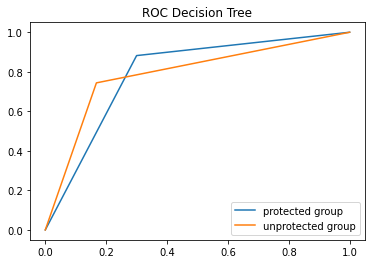

In [44]:
# 8- Plot ROC curve for the "protected group" (sensitive=1)

pred1 = dtc.predict_proba(xtest1)[:,1]
fpr1, tpr1, threshold1 = roc_curve(ytest1, pred1)

plt.title('ROC Decision Tree')
plt.plot(fpr1, tpr1, label="protected group")

# 9- On the same graph, plot the ROC curve for the "unprotected group" (sensitive=0)
pred0 = dtc.predict_proba(xtest0)[:,1]
fpr0, tpr0, threshold0 = roc_curve(ytest0, pred0)
plt.plot(fpr0, tpr0, label="unprotected group")
plt.legend()
plt.show()

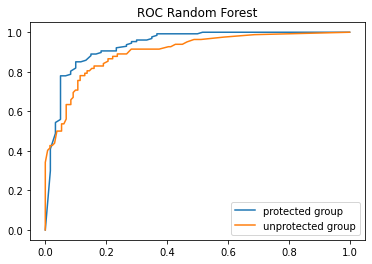

In [45]:
### EXAMPLE WITH ANOTHER TYPE OF CLASSIFIER

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=11)
rfc = RandomForestClassifier(random_state = 11)
rfc.fit(xtrain, ytrain)

xtest1 = xtest.loc[xtest.gender == 1]
ytest1 = ytest[xtest1.index]
xtest0 = xtest.loc[xtest.gender == 0]
ytest0 = ytest[xtest0.index]

pred1 = rfc.predict_proba(xtest1)[:,1]
fpr1, tpr1, threshold = roc_curve(ytest1, pred1)

plt.title('ROC Random Forest')
plt.plot(fpr1, tpr1, label="protected group")
pred0 = rfc.predict_proba(xtest0)[:,1]
fpr0, tpr0, threshold0 = roc_curve(ytest0, pred0)
plt.plot(fpr0, tpr0, label="unprotected group")
plt.legend()
plt.show()

In [52]:
# 10- Find a fair thresholding rule on the prediction of your classifier

threshold = size1/len(genderdatafile)
print("To be fair, we use the same reasonning as the weighting of samples since we have", size1, "people in the protected group (n1) and", size0, "people in the unprotected group.")
print("Then, if a value above n1/N = ", threshold, "(with N=2000: total number of people), then it predicts selected = 1")

To be fair, we use the same reasonning as the weighting of samples since we have 922 people in the protected group (n1) and 1078 people in the unprotected group.
Then, if a value above n1/N =  0.461 (with N=2000: total number of people), then it predicts selected = 1


In [60]:
# 11- Evaluate trade-off between accuracy and fairness
pred_threshold = (dtc.predict_proba(xtest)[:, 1] >= threshold).astype('int')


# accuracy
accuracy = accuracy_score(ytest, pred_threshold)
print("accuracy:", accuracy)

# fairness
xtest1 = xtest.loc[xtest.gender == 1]
ytest1 = ytest[xtest1.index]

xtest0 = xtest.loc[xtest.gender == 0]
ytest0 = ytest[xtest0.index]


# predictions per group:
ypred1 = dtc.predict(xtest1)
ypred0 = dtc.predict(xtest0)

# compute the corresponding score:
score1 = dtc.score(xtest1, ytest1)
score0 = dtc.score(xtest0, ytest0)

print("fairness:")
print("score1 (protected group): ", round(score1, 2)) 
print("score0 (not-protected group): ", round(score0, 2))  

accuracy: 0.81
fairness:
score1 (protected group):  0.82
score0 (not-protected group):  0.8
